KNN 으로 붓꽃 분류 하기
 - UCI 데이터셋 다운로드
 - pandas 로 읽기
 - 입력(X:꽃잎과 꽃받침의 길이 너비)과 출력(Y:품종) 분리
 - 150 개의 인스턴스(샘플), 학습용(75%), 테스트용(25%) 분리
 - K(k:3~5개 정도) NN 모델을 선정
 - 목표 : 테스트 샘플의 분류 정확도를 높이기

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('iris.data',header=None)
df.shape

(150, 5)

In [6]:
df.head()
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [18]:
df.info() # 컬럼 타입, 숫자로 변환해야 될지를 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
4    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


 - 150 개의 인스턴스(샘플), 학습용(75%), 테스트용(25%) 분리

In [23]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.iloc[:,:4]
y = df.iloc[:,-1]
X.shape,y.shape # X는 2차원, Y는 1차원

((150, 4), (150,))

In [41]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier(5)
KNeighborsClassifier
knn.fit(X_train, y_train) # 핏팅시키기

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [48]:
knn.predict(X_test)

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [70]:
knn.score(X_train,y_train),knn.score(X_test,y_test)

(0.9642857142857143, 1.0)

코스피 200 일거래 데이터, 종가 예측하기
 - 샘플 : 하루의 총 일거래 정보

In [153]:
url='http://finance.daum.net/domestic/kospi200'
url='코스피200_다음 금융.html'
tables = pd.read_html(url,index_col=0)
len(tables)

3

In [154]:
for table in tables:
    print(table.shape)

(10, 6)
(10, 8)
(10, 7)


In [155]:
type(tables[1])
df = tables[1]
df.head()

,종가,전일비,등락률,거래량,거래대금,개인(억),외국인(억),기관(억)
일자,,,,,,,,
19.07.02,276.57,▼0.70,-0.25%,22042,803157,336,62,-378
19.07.01,277.27,▼0.23,-0.08%,74357,3446049,-214,1286,365
19.06.28,277.50,▼0.25,-0.09%,67598,2879563,-1802,3011,-1189
19.06.27,277.75,▲2.22,+0.81%,66303,3357666,-4165,1837,2415
19.06.26,275.53,▲0.25,+0.09%,58818,2636531,-712,157,557


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 19.07.02 to 19.06.19
Data columns (total 8 columns):
종가        10 non-null float64
전일비       10 non-null object
등락률       10 non-null object
거래량       10 non-null int64
거래대금      10 non-null int64
개인(억)     10 non-null int64
외국인(억)    10 non-null int64
기관(억)     10 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 720.0+ bytes


In [157]:
df['전일비'] = df['전일비'].replace('▼','',regex=True)
df['전일비'] = df['전일비'].replace('▲','',regex=True)
df['등락률'] = df['등락률'].replace('%','',regex=True)
#df = df.replace('%','',regex=True)
#df = df.replace('+','',regex=True)

In [158]:
df['전일비'] = df['전일비'].astype(np.float)
df['등락률'] = df['등락률'].astype(np.float)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 19.07.02 to 19.06.19
Data columns (total 8 columns):
종가        10 non-null float64
전일비       10 non-null float64
등락률       10 non-null float64
거래량       10 non-null int64
거래대금      10 non-null int64
개인(억)     10 non-null int64
외국인(억)    10 non-null int64
기관(억)     10 non-null int64
dtypes: float64(3), int64(5)
memory usage: 1.0+ KB


In [169]:
df

,종가,전일비,등락률,거래량,거래대금,개인(억),외국인(억),기관(억)
일자,,,,,,,,
19.07.02,276.57,0.70,-0.25,22042,803157,336,62,-378
19.07.01,277.27,0.23,-0.08,74357,3446049,-214,1286,365
19.06.28,277.50,0.25,-0.09,67598,2879563,-1802,3011,-1189
19.06.27,277.75,2.22,0.81,66303,3357666,-4165,1837,2415
19.06.26,275.53,0.25,0.09,58818,2636531,-712,157,557
19.06.25,275.28,0.30,-0.11,60506,2635188,-364,277,-12
19.06.24,275.58,0.10,0.04,55539,2235175,-978,-1048,1966
19.06.21,275.48,0.53,-0.19,77279,3275700,538,206,-767
19.06.20,276.01,0.70,0.25,55336,2417864,-1342,-434,1762


In [197]:
# 입력X와 출력Y 분리
#x_0, x_1, x_2(아래첨자)... 소문자 x가 모여 대문자X가 된다는 의미
y = df['종가']
X = df.iloc[:,1:]
X.shape, y.shape

((10, 7), (10,))

In [233]:
offset = 8  # 상수 Magic Number 를 가능하면 사용하지 않는게 좋다
X_train = X[-offset:]
X_test = X[:-offset]
y_train = y[-offset:]
y_test = y[:-offset]
X_test 
y_train

일자
19.06.28    277.50
19.06.27    277.75
19.06.26    275.53
19.06.25    275.28
19.06.24    275.58
19.06.21    275.48
19.06.20    276.01
19.06.19    275.31
Name: 종가, dtype: float64

In [234]:
y_train

일자
19.06.28    277.50
19.06.27    277.75
19.06.26    275.53
19.06.25    275.28
19.06.24    275.58
19.06.21    275.48
19.06.20    276.01
19.06.19    275.31
Name: 종가, dtype: float64

In [235]:
from sklearn.neighbors import KNeighborsRegressor # Regressor 실수 예측용

In [236]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform')

In [237]:
knn.predict(X_test)

array([275.58, 277.75])

In [238]:
# p71 결정 계수 : R^2
knn.score(X_train, y_train) #trainset 에 k=1 이므로 당연히 100%

1.0

In [239]:
#.score()의 return 2종류 : classification 정확도, regression 결정 계수
knn.score(X_test, y_test) # 이 모델은 신뢰할 수 없다.

-3.940816326530917

KNN 장단점
 - 장점 : 이해해기 매우 쉬운 모데르, k를 많이 조정하지 않아도 좋은 성능, 좋은 시작점
 - 단점 : 전처리가 중요하다(정규화 필요), 특성(컬럼)이 많으면 동작 X, 특성값이 대부분이 0이면(희소한, sparse) X
 - 이러한 단점을 해결한 선형 모델(linear model)

In [240]:
import mglearn

w[0]: 0.393906  b: -0.031804


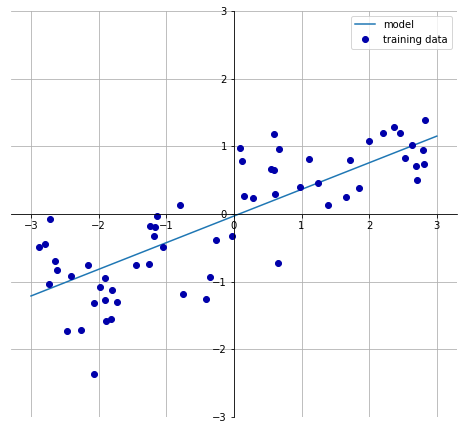

In [243]:
mglearn.plots.plot_linear_regression_wave() # KNN보다 좋다